In [641]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [642]:
class Person(object):
    def __init__(self):
        self.status = "Susceptible"
        self.days_sick = 0
        self.sickness_rate = 10
        self.interacted_with = []
        self.identity = 0
        self.immunocompromised = False
    
    def set_sickness_rate(self, new_rate):
        self.sickness_rate = new_rate
    
    def infect(self, number_of_days_sick):
        self.status = "Infected"
        self.days_sick = number_of_days_sick
    
    def recover(self):
        self.status = "Recovered"
        self.days_sick = 0
    
    def update(self):
        if (self.status == "Susceptible"):
            self.roll_for_infection()
            
        elif (self.status == "Infected"):            
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()
                
    def update_days_sick(self):
        if(self.status == "Infected"):
            self.days_sick = self.days_sick - 1
            if(self.days_sick <= 0):
                self.recover()

            
    def roll_for_infection(self):
        is_sick = (random.randint(0,101) < self.sickness_rate)
        if (is_sick):
            if (self.immunocompromised):
              self.days_sick * 4
              self.infect(self.days_sick)
            self.infect(self.days_sick)
            
    def interact(self, other):
        self.interacted_with.append(other)
        
    def identify_yourself(self, num):
        self.identity = num

In [643]:
# Joe = Person()
# Jane = Person()
# Jane.set_sickness_rate(20) #jane has a different sickness rate, joe has the default

# day = 0

# while (Joe.status != "Recovered" or Jane.status != "Recovered"):
#     day = day + 1        
#     Joe.update()
#     if (Joe.status == "Infected" or Jane.status == "Infected"):
#         Jane.update()
        
        
#     print("Joe is " + Joe.status + " day:" + str(day))
#     print("Jane is " + Jane.status + " day:" + str(day))
    
#     #My conditions didn't happen, let's rerun
#     #if Joe is recovered and Jane is still susceptable, the condtions for our program weren't met
#     #run it again!
    
#     if (Joe.status == "Recovered" and Jane.status == "Susceptible"):
#         Joe.status = "Susceptible"
#         day = 1
#         print()
#         print ("------- reset -------")

In [644]:
my_population = []
they_are_sick = []

for i in range(0,100):
    generic_dude = Person()
    generic_dude.identify_yourself(i)
    my_population.append(generic_dude)

person_num = 0
    
for person in my_population:
    # while len(person.interacted_with) < 10:
    #     interact_with = random.randint(0,99)
    #     while(person_num in my_population[interact_with].interacted_with or person_num == interact_with or len(my_population[interact_with].interacted_with) > 9):
    #         interact_with = random.randint(0,99)
    #     person.interact(interact_with)
    #     my_population[interact_with].interact(person_num)
    # print("Person",person_num,"interacted with",person.interacted_with)
    
    while len(person.interacted_with) < 10:
        interact_with = random.randint(0,99)
        while(person_num in my_population[interact_with].interacted_with or person_num == interact_with):
             interact_with = random.randint(0,99)
             
        person.interact(interact_with)
    #print("Person",person_num,"interacted with",person.interacted_with)
    person_num = person_num + 1
    
infected_count = 0
initial_infected = []
infected_day_1 = []
total_infected = []

for i in range(0,10):
    you_are_sick = random.randint(0,99)
    my_population[you_are_sick].infect(5)
    for person in my_population[you_are_sick].interacted_with:
        my_population[person].update()
    initial_infected.append(you_are_sick)


for person in my_population:
    if(person.status == "Infected"):
        infected_count = infected_count + 1
        total_infected.append(person.identity)
    if(person.status == "Infected" and initial_infected.count(person.identity) == 0):
        infected_day_1.append(person.identity)

print("Number of people infected:",infected_count)
print("All infected:",total_infected)
print("First 10 infected:",initial_infected)
print("Infected from first 10:",infected_day_1)


Number of people infected: 16
All infected: [3, 4, 7, 20, 24, 30, 31, 35, 47, 55, 62, 63, 65, 81, 87, 89]
First 10 infected: [30, 20, 4, 24, 89, 87, 3, 65, 35, 63]
Infected from first 10: [7, 31, 47, 55, 62, 81]


In [645]:
class Population:
    def __init__(self, number=100, interaction=10):
        self.People = []
        self.number = number
        self.interaction = interaction
        
        if(number < 100):
            self.number = 100
            
        if(interaction < 10):
            self.interaction = 10
            
        #build our population
        patient_Zero = Person()
        patient_Zero.infect(5)
        
        self.People.append(patient_Zero)
        
        for i in range(0, number):
          p = Person()
          j= random.randint(0,100)
          if j<3:
            p.immunocompromised = True
            p.set_sickness_rate(p.sickness_rate*3)
          self.People.append(p)

    def number_of_sick(self):
        sick_Count = 0
        for j in self.People:
            if(j.status == "Infected"):
                sick_Count = sick_Count + 1
        return sick_Count
    
    def number_of_recovered(self):
        recovered_Count = 0
        for j in self.People:
            if(j.status == "Recovered"):
                recovered_Count = recovered_Count + 1
                
        return recovered_Count
    
    def number_of_susceptible(self):
        susceptible_Count = 0
        for j in self.People:
            if(j.status == "Susceptible"):
                susceptible_Count = susceptible_Count + 1
                
        return susceptible_Count
    
    
    def update(self):
        
        might_Get_Sick = []
        
        for person in self.People:
            person.Interaction = []
            for i in range(0, self.interaction):
                r = random.randint(0, self.number)
                person.Interaction.append(r)
            
            if(person.status == "Infected"):
                person.update_days_sick()
                for m in person.Interaction:
                    if(self.People[m].status == "Susceptible"):
                        might_Get_Sick.append(self.People[m])
            
            if(person.status == "Susceptible"):
                for m in person.Interaction:
                    if(self.People[m].status == "Infected"):
                        might_Get_Sick.append(person)
                        
        for m in might_Get_Sick:
            m.roll_for_infection()
  
        

In [646]:
myCommunity = Population(10000, 10)
day = 0
my_plot = []
number_sick = myCommunity.number_of_sick()
while(number_sick > 0):
    number_sick = myCommunity.number_of_sick()
    number_recovered = myCommunity.number_of_recovered()
    number_susceptible = myCommunity.number_of_susceptible()
    my_plot.append([day,number_sick,number_recovered,number_susceptible])
    print("day:",day,"Number of sick:",number_sick)
    day = day + 1
    myCommunity.update()
    
print("day:",day,"Number of sick:",myCommunity.number_of_sick())
print("Number recovered:",myCommunity.number_of_recovered())
print("Number susceptible:",myCommunity.number_of_susceptible())
print(my_plot)

day: 0 Number of sick: 1
day: 1 Number of sick: 4
day: 2 Number of sick: 7
day: 3 Number of sick: 13
day: 4 Number of sick: 21
day: 5 Number of sick: 25
day: 6 Number of sick: 46
day: 7 Number of sick: 68
day: 8 Number of sick: 86
day: 9 Number of sick: 126
day: 10 Number of sick: 190
day: 11 Number of sick: 279
day: 12 Number of sick: 351
day: 13 Number of sick: 415
day: 14 Number of sick: 534
day: 15 Number of sick: 622
day: 16 Number of sick: 614
day: 17 Number of sick: 512
day: 18 Number of sick: 436
day: 19 Number of sick: 333
day: 20 Number of sick: 256
day: 21 Number of sick: 172
day: 22 Number of sick: 123
day: 23 Number of sick: 71
day: 24 Number of sick: 48
day: 25 Number of sick: 28
day: 26 Number of sick: 19
day: 27 Number of sick: 10
day: 28 Number of sick: 4
day: 29 Number of sick: 4
day: 30 Number of sick: 6
day: 31 Number of sick: 1
day: 32 Number of sick: 0
day: 33 Number of sick: 0
Number recovered: 5421
Number susceptible: 4580
[[0, 1, 0, 10000], [1, 4, 0, 9997], [2,

In [647]:
df = pd.DataFrame(my_plot, columns=['day','number_sick','number_recovered', 'number_susceptible'])
df

,day,number_sick,number_recovered,number_susceptible
0,0,1,0,10000
1,1,4,0,9997
2,2,7,3,9991
3,3,13,9,9979
4,4,21,21,9959
5,5,25,42,9934
6,6,46,67,9888
7,7,68,113,9820
8,8,86,181,9734
9,9,126,267,9608


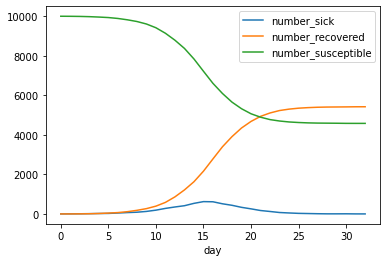

In [648]:
fig = plt.figure()
ax = plt.gca()
fig1 = df.plot(kind='line',x='day',y='number_sick',ax=ax).get_figure()
fig2 = df.plot(kind='line',x='day',y='number_recovered',ax=ax).get_figure()
fig3 = df.plot(kind='line',x='day',y='number_susceptible',ax=ax).get_figure()
plt.savefig('test.png',bbox_inches='tight')
plt.show()

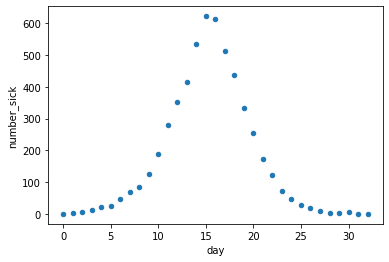

In [649]:
df.plot.scatter (x= 'day', y= 'number_sick')

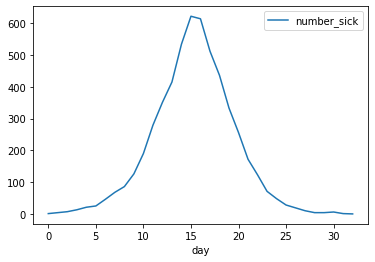

In [650]:
fig= plt.figure()
ax= plt.gca()
fig1 = df.plot(kind='line',x='day',y='number_sick',ax=ax).get_figure()
plt.show()